In [221]:
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import metrics
from feature_selector_regression import RegressionFeatureSelector
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# import pandas_profiling

In [135]:
def get_results(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'MSE: {mse}')
    print(f'R2 score: {r2}')
    return mse, r2

In [136]:
def get_improvements(val1, val2):
    print(f'Improvement of: {((1 - (val2 / val1)) * 100).round(4)}%')

In [137]:
def make_plot(y, y_test, y_pred):
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    errors = abs(y_pred - y_test)

    # Calculate mean absolute percentage error (MAPE)
    mape = 100 * (errors / y_test)
    # Calculate and display accuracy
    accuracy = 100 - np.mean(mape)
    print('Accuracy:', round(accuracy, 2), '%.')

    import seaborn as sns
    plt.figure(figsize=(5, 7))

    ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
    sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)

    plt.title('Actual vs Fitted Values for Price')

    plt.show()

In [138]:
df_original = pd.read_csv('./garments_worker_productivity.csv')

In [139]:
df_original.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [140]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [141]:
df_original.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [142]:
df_original = df_original.fillna(0)

In [143]:
df_original.isna().sum()

date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64

## Trying different methods of encoding categorical features into numerical

### Training model with label encoded data

In [144]:
df_1 = df_original.copy()

In [145]:
label_encoder=LabelEncoder()

In [146]:
df_1['department_Clean'] = label_encoder.fit_transform(df_1['department'])
df_1['day_clean'] = label_encoder.fit_transform(df_1['day'])
df_1['quarter_clean'] = label_encoder.fit_transform(df_1['quarter'])
df_1.drop('department', inplace=True, axis=1)
df_1.drop('day', inplace=True, axis=1)
df_1.drop('date', inplace=True, axis=1)
df_1.drop('quarter', inplace=True, axis=1)
df_1.drop('targeted_productivity', inplace=True, axis=1)

In [147]:
df_1.head()

,team,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,department_Clean,day_clean,quarter_clean
0,8,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,2,3,0
1,1,3.94,0.0,960,0,0.0,0,0,8.0,0.886500,1,3,0
2,11,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,2,3,0
3,12,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,2,3,0
4,6,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,2,3,0


In [148]:
model_1 = RandomForestRegressor(n_estimators=50,
                                criterion='mse',
                                n_jobs=-1,
                                random_state=42)

In [149]:
X_1 = df_1.drop('actual_productivity', axis=1)
y_1 = df_1['actual_productivity']

X_1, y_1

(      team    smv     wip  over_time  incentive  idle_time  idle_men  \
 0        8  26.16  1108.0       7080         98        0.0         0   
 1        1   3.94     0.0        960          0        0.0         0   
 2       11  11.41   968.0       3660         50        0.0         0   
 3       12  11.41   968.0       3660         50        0.0         0   
 4        6  25.90  1170.0       1920         50        0.0         0   
 ...    ...    ...     ...        ...        ...        ...       ...   
 1192    10   2.90     0.0        960          0        0.0         0   
 1193     8   3.90     0.0        960          0        0.0         0   
 1194     7   3.90     0.0        960          0        0.0         0   
 1195     9   2.90     0.0       1800          0        0.0         0   
 1196     6   2.90     0.0        720          0        0.0         0   
 
       no_of_style_change  no_of_workers  department_Clean  day_clean  \
 0                      0           59.0         

In [150]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1,
                                                            y_1,
                                                            random_state=42)

In [151]:
model_1 = model_1.fit(X_train_1, y_train_1)

In [152]:
y_pred_1 = model_1.predict(X_test_1)

In [153]:
mse_1, r2_1 = get_results(y_test_1, y_pred_1)

MSE: 0.0176144239027942
R2 score: 0.3744679778302752


Mean Absolute Error: 0.08563355431002113
Mean Squared Error: 0.0176144239027942
Root Mean Squared Error: 0.132719342609863
Accuracy: 85.32 %.


/Users/daniyarkurmanbayev/Documents/GBC/mlenv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/daniyarkurmanbayev/Documents/GBC/mlenv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


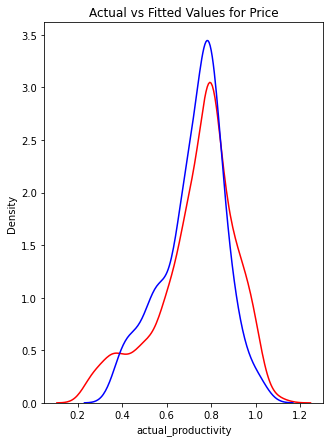

In [154]:
make_plot(y_1, y_test_1, y_pred_1)

### Training model with get_dummies

In [155]:
df_2 = df_original.copy()
df_2.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [156]:
dummies = pd.get_dummies(df_2[['quarter', 'department', 'day']])
df_2.drop('department', inplace=True, axis=1)
df_2.drop('day', inplace=True, axis=1)
df_2.drop('date', inplace=True, axis=1)
df_2.drop('quarter', inplace=True, axis=1)
df_2.drop('targeted_productivity', inplace=True, axis=1)
df_2 = pd.concat([df_2, dummies], axis=1)

In [157]:
df_2.head()

,team,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,...,quarter_Quarter5,department_finishing,department_finishing,department_sweing,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,8,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,...,0,0,0,1,0,0,0,1,0,0
1,1,3.94,0.0,960,0,0.0,0,0,8.0,0.886500,...,0,0,1,0,0,0,0,1,0,0
2,11,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,...,0,0,0,1,0,0,0,1,0,0
3,12,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,...,0,0,0,1,0,0,0,1,0,0
4,6,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,...,0,0,0,1,0,0,0,1,0,0


In [158]:
X_2 = df_2.drop('actual_productivity', axis=1)
y_2 = df_2['actual_productivity']

X_2, y_2

(      team    smv     wip  over_time  incentive  idle_time  idle_men  \
 0        8  26.16  1108.0       7080         98        0.0         0   
 1        1   3.94     0.0        960          0        0.0         0   
 2       11  11.41   968.0       3660         50        0.0         0   
 3       12  11.41   968.0       3660         50        0.0         0   
 4        6  25.90  1170.0       1920         50        0.0         0   
 ...    ...    ...     ...        ...        ...        ...       ...   
 1192    10   2.90     0.0        960          0        0.0         0   
 1193     8   3.90     0.0        960          0        0.0         0   
 1194     7   3.90     0.0        960          0        0.0         0   
 1195     9   2.90     0.0       1800          0        0.0         0   
 1196     6   2.90     0.0        720          0        0.0         0   
 
       no_of_style_change  no_of_workers  quarter_Quarter1  ...  \
 0                      0           59.0               

In [159]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2,
                                                            y_2,
                                                            random_state=42)

In [160]:
model_2 = RandomForestRegressor(n_estimators=50,
                                criterion='mse',
                                n_jobs=-1,
                                random_state=42)

In [161]:
model_2 = model_2.fit(X_train_2, y_train_2)

In [162]:
y_pred_2 = model_2.predict(X_test_2)

In [163]:
mse_2, r2_2 = get_results(y_test_2, y_pred_2)

MSE: 0.016718599674383952
R2 score: 0.40628092523057047


In [164]:
get_improvements(mse_1, mse_2)

Improvement of: 5.0857%


Mean Absolute Error: 0.08251280488617113
Mean Squared Error: 0.016718599674383952
Root Mean Squared Error: 0.12930042410751774
Accuracy: 85.78 %.


/Users/daniyarkurmanbayev/Documents/GBC/mlenv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/daniyarkurmanbayev/Documents/GBC/mlenv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


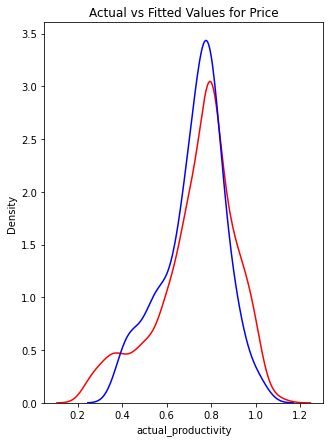

In [165]:
make_plot(y_2, y_test_2, y_pred_2)

#### Results: the get_dummies shows better results

## Trying different methods of normalizing the data

### MinMaxScaler

In [166]:
df_3 = df_2.copy()
df_3.head()

,team,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,...,quarter_Quarter5,department_finishing,department_finishing,department_sweing,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,8,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,...,0,0,0,1,0,0,0,1,0,0
1,1,3.94,0.0,960,0,0.0,0,0,8.0,0.886500,...,0,0,1,0,0,0,0,1,0,0
2,11,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,...,0,0,0,1,0,0,0,1,0,0
3,12,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,...,0,0,0,1,0,0,0,1,0,0
4,6,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,...,0,0,0,1,0,0,0,1,0,0


In [167]:
X_3, y_3 = X_2, y_2

In [168]:
min_max_scaler = MinMaxScaler()

In [169]:
X_3 = min_max_scaler.fit_transform(X_3)

In [170]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3,
                                                            y_3,
                                                            random_state=42)

In [171]:
model_3 = RandomForestRegressor(n_estimators=50,
                                criterion='mse',
                                n_jobs=-1,
                                random_state=42)

In [172]:
model_3 = model_3.fit(X_train_3, y_train_3)

In [173]:
y_pred_3 = model_3.predict(X_test_3)

In [174]:
mse_3, r2_3 = get_results(y_test_3, y_pred_3)

MSE: 0.016667722957911888
R2 score: 0.4080876840273244


In [175]:
get_improvements(mse_2, mse_3)

Improvement of: 0.3043%


Mean Absolute Error: 0.08232692339754889
Mean Squared Error: 0.016667722957911888
Root Mean Squared Error: 0.12910353580716483
Accuracy: 85.82 %.


/Users/daniyarkurmanbayev/Documents/GBC/mlenv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/daniyarkurmanbayev/Documents/GBC/mlenv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


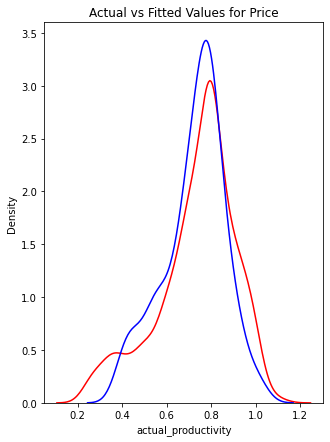

In [176]:
make_plot(y_3, y_test_3, y_pred_3)

### StandardScaler

In [177]:
df_4 = df_original.copy()
df_4.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [178]:
dummies = pd.get_dummies(df_4[['quarter', 'department', 'day']])
df_4.drop('department', inplace=True, axis=1)
df_4.drop('day', inplace=True, axis=1)
df_4.drop('date', inplace=True, axis=1)
df_4.drop('quarter', inplace=True, axis=1)
df_4 = pd.concat([df_4, dummies], axis=1)

In [179]:
df_targeted = df_4['targeted_productivity']

In [180]:
X_4 = df_4.drop('actual_productivity', axis=1)
X_4 = X_4.drop('targeted_productivity', axis=1)
X_4.head()

,team,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,quarter_Quarter1,...,quarter_Quarter5,department_finishing,department_finishing,department_sweing,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,8,26.16,1108.0,7080,98,0.0,0,0,59.0,1,...,0,0,0,1,0,0,0,1,0,0
1,1,3.94,0.0,960,0,0.0,0,0,8.0,1,...,0,0,1,0,0,0,0,1,0,0
2,11,11.41,968.0,3660,50,0.0,0,0,30.5,1,...,0,0,0,1,0,0,0,1,0,0
3,12,11.41,968.0,3660,50,0.0,0,0,30.5,1,...,0,0,0,1,0,0,0,1,0,0
4,6,25.90,1170.0,1920,50,0.0,0,0,56.0,1,...,0,0,0,1,0,0,0,1,0,0


In [181]:
y_4 = pd.concat([df_4['actual_productivity'], df_4['targeted_productivity']], axis=1)
y_4.head()

,actual_productivity,targeted_productivity
0,0.940725,0.80
1,0.886500,0.75
2,0.800570,0.80
3,0.800570,0.80
4,0.800382,0.80


In [182]:
standart_scaler = StandardScaler()

In [183]:
X_4 = min_max_scaler.fit_transform(X_4)

In [184]:
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_4,
                                                            y_4,
                                                            random_state=42)

y_train_4.drop('targeted_productivity', inplace=True, axis=1)

y_targeted = y_test_4.drop('actual_productivity', axis=1)
y_test_4.drop('targeted_productivity', inplace=True, axis=1)

/Users/daniyarkurmanbayev/Documents/GBC/mlenv/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [185]:
y_targeted.head()

,targeted_productivity
921,0.6
321,0.8
101,0.8
920,0.7
58,0.8


In [186]:
model_4 = RandomForestRegressor(n_estimators=50,
                                criterion='mse',
                                n_jobs=-1,
                                random_state=42)

In [187]:
model_4 = model_4.fit(X_train_4, y_train_4)

/var/folders/1b/216kmv2s3731399_bt742lgw0000gn/T/ipykernel_1371/1488413870.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_4 = model_4.fit(X_train_4, y_train_4)


In [188]:
y_pred_4 = model_4.predict(X_test_4)

In [189]:
y_pred_pd = pd.DataFrame(y_pred_4, columns=['predicted_productivity'])

In [190]:
y_targeted.to_csv('targeted_productivity.csv', index=False)
y_pred_pd.to_csv('predicted_productivity.csv', index=False)

In [191]:
mse_4, r2_4 = get_results(y_test_4, y_pred_4)

MSE: 0.016667722957911885
R2 score: 0.40808768402732454


In [192]:
get_improvements(mse_2, mse_4)

Improvement of: 0.3043%


In [193]:
mse_3/mse_4

1.0000000000000002

In [194]:
# make_plot(y_4, y_test_4, y_pred_4)

#### StandardScaler show slightly better results

## Feature Selection

In [195]:
X_5, y_5 = pd.DataFrame(X_4, columns=X_2.columns), pd.DataFrame(y_4, columns=['actual_productivity'])

In [196]:
X_5.shape

(1197, 23)

In [197]:
y_5.shape

(1197, 1)

In [198]:
selector = RegressionFeatureSelector(n_jobs=-1)

In [199]:
# selector.sort_features(X=X_5,
                       # y=y_5)

In [200]:
# selector.sorted_features_

In [201]:
# selector.feature_support_

In [202]:
mse_5 = 1
r2_5 = None
number_of_features_5 = None
best_features_5 = None
estimator_5 = None
y_pred_5 = None
y_test_5 = None

In [215]:
for i in range(19, 20):
    print(f'calculating for first {i} features')
    selector.sort_features(X=X_5,
                           y=y_5,
                           number_of_features=i)
    test_features = selector.sorted_features_[:i]
    X_5_1 = X_5[test_features]
    X_train_test, X_test_test, y_train_test, y_test_test = train_test_split(X_5_1,
                                                                            y_5,
                                                                            random_state=42)
    test_model = RandomForestRegressor(n_estimators=50,
                                       criterion='mse',
                                       n_jobs=-1,
                                       random_state=42)
    test_model = test_model.fit(X_train_test, y_train_test)
    y_pred_test = test_model.predict(X_test_test)
    mse_test, r2_test = get_results(y_test_test, y_pred_test)
    if mse_test < mse_5:
        mse_5 = mse_test
        r2_5 = r2_test
        number_of_features_5 = i
        best_features_5 = test_features
        estimator_5 = test_model
        y_pred_5 = y_pred_test
        y_test_5 = y_test_test

calculating for first 19 features
Calculating pearson
Calculating mutual_info
Calculating rfe
Calculating lin-reg
Calculating rf
Calculating lgbm
MSE: 0.018313042280044347
R2 score: 0.34965830090539474


/Users/daniyarkurmanbayev/Documents/GBC/mlenv/lib/python3.8/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/daniyarkurmanbayev/Documents/GBC/mlenv/lib/python3.8/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Users/daniyarkurmanbayev/Documents/GBC/mlenv/lib/python3.8/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/Users/daniyarkurmanbayev/Documents/GBC/mlenv/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/daniyarkurmanbayev/Documents/GBC/mlenv/lib/python3.8/site-packages/sklearn/feature_selection/_rfe.py:266: DataConversionW

In [212]:
number_of_features_5

19

In [225]:
best_features_5

['smv',
 'over_time',
 'no_of_workers',
 'incentive',
 'wip',
 'team',
 'no_of_style_change',
 'idle_men',
 'quarter_Quarter5',
 'quarter_Quarter4',
 'quarter_Quarter3',
 'quarter_Quarter2',
 'quarter_Quarter1',
 'idle_time',
 'department_sweing',
 'department_finishing ',
 'department_finishing',
 'day_Monday',
 'day_Wednesday']

In [216]:
selector.feature_support_

,Feature,pearson,mutual_info,rfe,lin-reg,rf,lgbm,Total
1,smv,True,True,True,True,True,True,6
2,over_time,True,True,True,True,True,True,6
3,no_of_workers,True,True,True,True,True,True,6
4,incentive,True,True,True,True,True,True,6
5,wip,True,True,True,True,False,False,4
6,team,False,True,True,False,True,True,4
7,no_of_style_change,True,True,True,True,False,False,4
8,idle_men,True,True,True,True,False,False,4
9,quarter_Quarter5,True,True,True,False,False,False,3
10,quarter_Quarter4,True,True,True,False,False,False,3


In [217]:
mse_5, r2_5 = get_results(y_test_5, y_pred_5)

MSE: 0.016633314717583395
R2 score: 0.40930960625826207


In [ ]:
get_improvements(mse_4, mse_5)

#### The results are better when all features are used

## Grid search

In [226]:
X_6, y_6 = pd.DataFrame(X_5, columns=X_2.columns), \
           pd.DataFrame(y_5, columns=['actual_productivity'])

In [227]:
X_train_6, X_test_6, y_train_6, y_test_6 = train_test_split(X_6,
                                                            y_6,
                                                            random_state=42)

In [208]:
max_depth = np.max([e.get_depth() for e in model_4.estimators_])
max_depth

25

In [209]:
n_estimators = [50, 100, 150, 300, 500, 1000]
max_depths = [None] + [num for num in np.linspace(5, max_depth, 4)]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
max_features = ['auto', 'sqrt', 'log2']
bootstrap = [True, False]

random_grid = {
    'n_estimators': n_estimators,
    'criterion': ['mse'],
    'max_depth': max_depths,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'max_features': max_features,
    'bootstrap': bootstrap,
    'random_state': [42]
}

In [210]:
grid_model = RandomForestRegressor()
grid = GridSearchCV(grid_model, random_grid, n_jobs=-1)

In [211]:
grid.fit(X_train_6, y_train_6)

KeyboardInterrupt: 

In [ ]:
model_6 = grid.best_estimator_

In [ ]:
grid.best_params_

In [ ]:
{
    'bootstrap': False,
    'criterion': 'mse',
    'max_depth': None,
    'max_features': 'sqrt',
    'min_samples_leaf': 2,
    'min_samples_split': 5,
    'n_estimators': 100,
    'random_state': 42
}

In [ ]:
y_pred_6 = model_6.predict(X_test_6)

In [ ]:
mse_6, r2_6 = get_results(y_test_6, y_pred_6)

* MSE: 0.016873152860963938
* R2 score: 0.40079235700559335

In [ ]:
make_plot(y_6, pd.DataFrame(y_test_6), pd.DataFrame(y_pred_6))

In [ ]:
get_improvements(mse_4, mse_6)

In [245]:
get_improvements(mse_5, 0.016873152860963938)

Improvement of: -1.4419%


Improvement of: -1.2325%

#### Grid search didn't give any improvement in MSE

In [228]:
X_8 = X_5[best_features_5]
X_8, y_8 = pd.DataFrame(X_8, columns=X_8.columns), \
           pd.DataFrame(y_5, columns=['actual_productivity'])

In [229]:
X_train_8, X_test_8, y_train_8, y_test_8 = train_test_split(X_8,
                                                            y_8,
                                                            random_state=42)

In [230]:
max_depth = np.max([e.get_depth() for e in model_4.estimators_])
max_depth

25

In [231]:
n_estimators = [50, 100, 150, 300, 500, 1000]
max_depths = [None] + [num for num in np.linspace(5, max_depth, 4)]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
max_features = ['auto', 'sqrt', 'log2']
bootstrap = [True, False]

random_grid = {
    'n_estimators': n_estimators,
    'criterion': ['mse'],
    'max_depth': max_depths,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'max_features': max_features,
    'bootstrap': bootstrap,
    'random_state': [42]
}

In [232]:
grid_model_2 = RandomForestRegressor()
grid_2 = RandomizedSearchCV(grid_model_2,
                            random_grid,
                            n_iter=10,
                            cv=3,
                            random_state=42,
                            n_jobs=-1)

In [236]:
grid_2.fit(X_train_8, y_train_8)

/Users/daniyarkurmanbayev/Documents/GBC/mlenv/lib/python3.8/site-packages/sklearn/model_selection/_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['mse'],
                                        'max_depth': [None, 5.0,
                                                      11.666666666666668,
                                                      18.333333333333336,
                                                      25.0],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 150, 300, 500,
                                                         1000],
                                        'random_state': [42]},
                   random_state=42

In [237]:
model_8 = grid_2.best_estimator_

In [238]:
grid_2.best_params_

{'random_state': 42,
 'n_estimators': 500,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 11.666666666666668,
 'criterion': 'mse',
 'bootstrap': False}

In [239]:
y_pred_8 = model_8.predict(X_test_8)

In [240]:
mse_8, r2_8 = get_results(y_test_8, y_pred_8)

MSE: 0.01623657551618213
R2 score: 0.4233988024928982


In [243]:
get_improvements(mse_4, mse_5)

Improvement of: 0.2064%


/Users/daniyarkurmanbayev/Documents/GBC/mlenv/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/daniyarkurmanbayev/Documents/GBC/mlenv/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/daniyarkurmanbayev/Documents/GBC/mlenv/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/daniyarkurmanbayev/Documents/G

## Visualization

In [ ]:
X_7, y_7 = X_4, y_4

In [ ]:
y_pred_7 = y_pred_4
y_test_7 = y_test_4.to_numpy()

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(range(0, y_pred_7.size), y_pred_7, color='blue', alpha=0.5)
plt.plot(range(0, y_test_7.size), y_test_7, color='red', alpha=0.5)
plt.xlabel('Features')
plt.ylabel('Actual productivity')
plt.show()
